In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../ela_features_with_classes.csv')
data = data.drop(columns=['Unnamed: 0', 'function_id'])
X = data[['int', 'lr2', 'max', 'eps_ratio', 'disp', 'nbc']]
y = data['function_class']

In [3]:
scaler = StandardScaler()
#will be used later for clustering
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
preds_classification = knn.predict(X_scaled)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
preds_clusterization = kmeans.fit_predict(X_scaled)

In [6]:
best_alg_results = pd.read_csv('../optimization_results2.csv')
best_alg_results.head()

,Problem ID,Function ID,Instance ID,Algorithm,Best Solution (X),Best Function Value (F)
0,bbob_f001_i01_d20,1,1,PSO,"[0.25271295628667456, -1.1567240917649382, -0....",79.480001
1,bbob_f001_i01_d20,1,1,CMAES,"[0.2527999722638068, -1.1567999681501844, -0.7...",79.480000
2,bbob_f001_i01_d20,1,1,DE,"[0.23997986691433615, -1.173100748697348, -0.7...",79.493205
3,bbob_f001_i01_d20,1,1,L-BFGS-B,"[0.25280004924197097, -1.156800450762462, -0.7...",79.480000
4,bbob_f001_i01_d20,1,1,BIPOP-CMAES,"[0.2527999680449557, -1.1567999946809069, -0.7...",79.480000


In [7]:
def calculate_proportional_scores(group):
    group["Best Function Value (F)"] = group["Best Function Value (F)"].fillna(float('inf'))
    
    best_value = group["Best Function Value (F)"].min()
    worst_value = group["Best Function Value (F)"].max()
    
    if best_value == worst_value: # case when all algorithms have the same value
        group["Score"] = 1.0
    else:
        group["Score"] = (worst_value - group["Best Function Value (F)"]) / (worst_value - best_value)
    
    return group

best_alg_results = best_alg_results.groupby("Problem ID").apply(calculate_proportional_scores)

result = best_alg_results.pivot(index="Problem ID", columns="Algorithm", values="Score").reset_index()

result.fillna(0, inplace=True)

result.columns.name = None

result


,Problem ID,BIPOP-CMAES,CMAES,DE,L-BFGS-B,PSO
0,bbob_f001_i01_d20,1.000000,1.000000,0.000000,1.0,0.999944
1,bbob_f001_i02_d20,1.000000,1.000000,0.000000,1.0,0.999952
2,bbob_f001_i03_d20,1.000000,1.000000,0.000000,1.0,0.999501
3,bbob_f001_i04_d20,1.000000,1.000000,0.000000,1.0,0.999980
4,bbob_f001_i05_d20,1.000000,1.000000,0.000000,1.0,0.999731
...,...,...,...,...,...,...
1195,bbob_f024_i46_d20,1.000000,0.832141,0.764236,0.0,0.753639
1196,bbob_f024_i47_d20,1.000000,0.957553,0.751749,0.0,0.777963
1197,bbob_f024_i48_d20,1.000000,0.807149,0.798139,0.0,0.802887
1198,bbob_f024_i49_d20,0.906234,1.000000,0.707872,0.0,0.883216


In [8]:
result['Classification class'] = preds_classification
result['Clusterization class'] = preds_clusterization
result

,Problem ID,BIPOP-CMAES,CMAES,DE,L-BFGS-B,PSO,Classification class,Clusterization class
0,bbob_f001_i01_d20,1.000000,1.000000,0.000000,1.0,0.999944,1,3
1,bbob_f001_i02_d20,1.000000,1.000000,0.000000,1.0,0.999952,1,3
2,bbob_f001_i03_d20,1.000000,1.000000,0.000000,1.0,0.999501,1,3
3,bbob_f001_i04_d20,1.000000,1.000000,0.000000,1.0,0.999980,1,3
4,bbob_f001_i05_d20,1.000000,1.000000,0.000000,1.0,0.999731,1,3
...,...,...,...,...,...,...,...,...
1195,bbob_f024_i46_d20,1.000000,0.832141,0.764236,0.0,0.753639,5,4
1196,bbob_f024_i47_d20,1.000000,0.957553,0.751749,0.0,0.777963,5,4
1197,bbob_f024_i48_d20,1.000000,0.807149,0.798139,0.0,0.802887,5,4
1198,bbob_f024_i49_d20,0.906234,1.000000,0.707872,0.0,0.883216,5,4


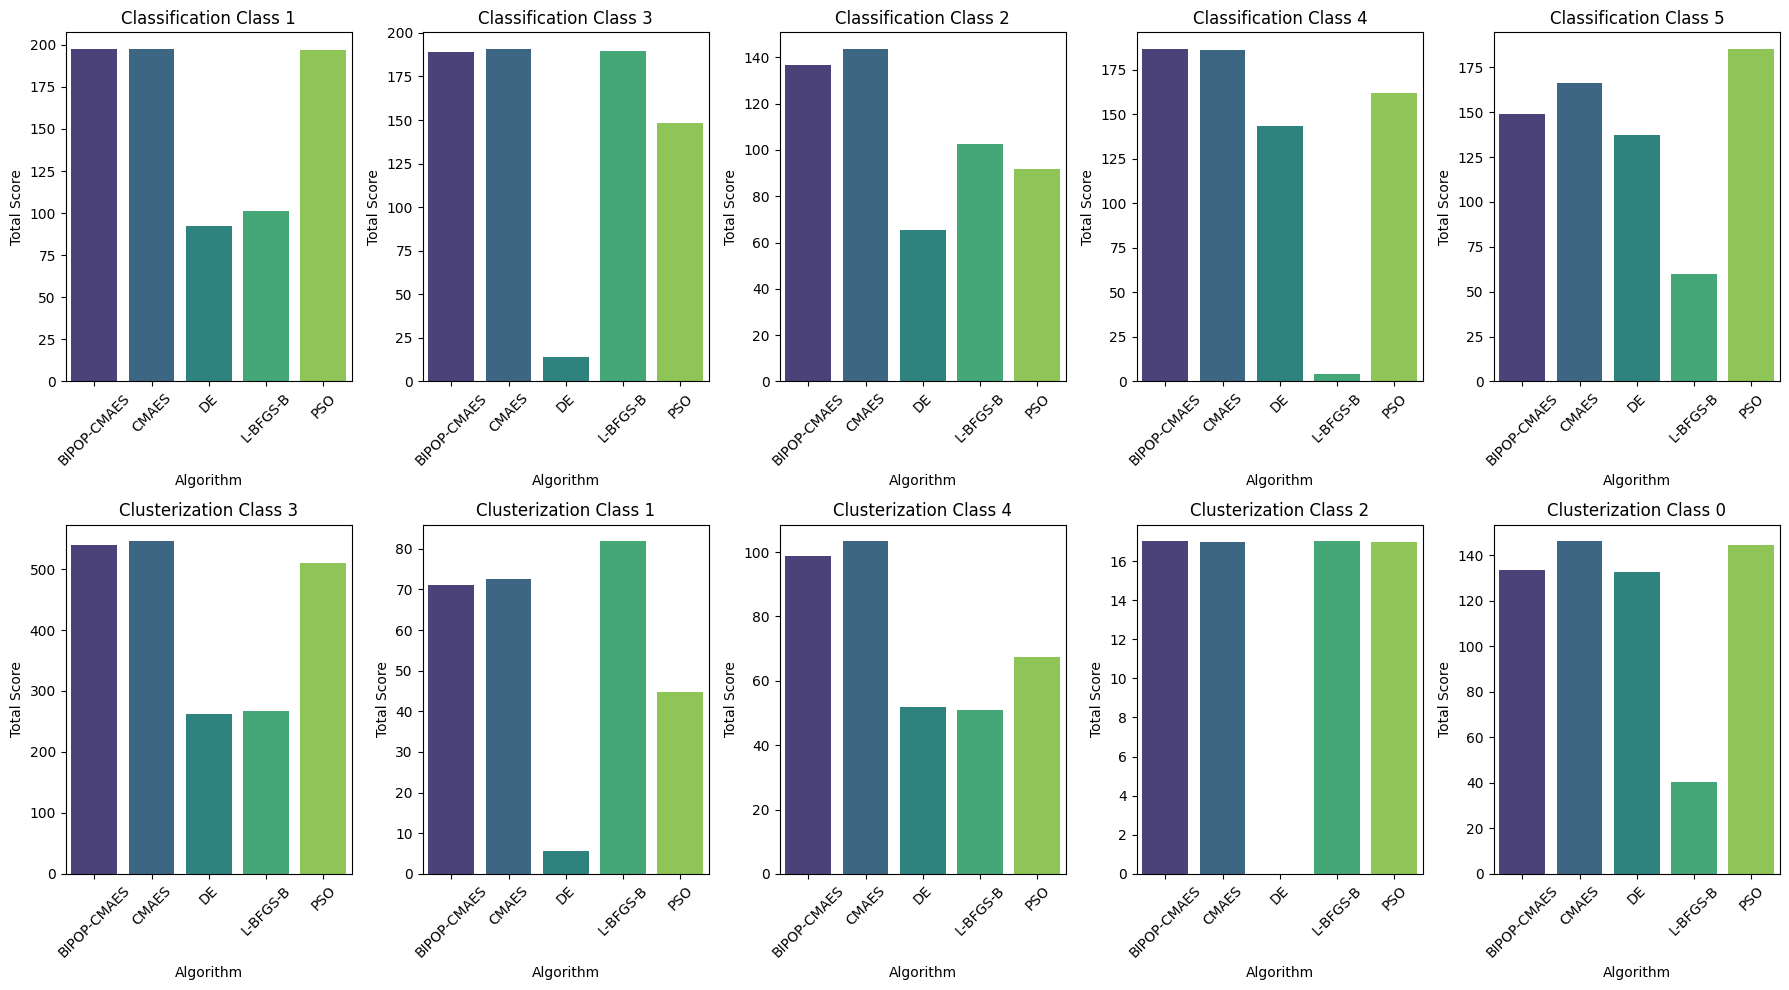

In [9]:
melted = result.melt(
    id_vars=["Classification class", "Clusterization class"],
    value_vars=["BIPOP-CMAES", "CMAES", "DE", "L-BFGS-B", "PSO"],
    var_name="Algorithm",
    value_name="Score",
)

classification_classes = melted["Classification class"].unique()
clusterization_classes = melted["Clusterization class"].unique()

num_classification_plots = len(classification_classes)
num_clusterization_plots = len(clusterization_classes)
fig, axes = plt.subplots(2, max(num_classification_plots, num_clusterization_plots), figsize=(18, 10))

for i, cls in enumerate(classification_classes):
    grouped = melted[melted["Classification class"] == cls].groupby("Algorithm")["Score"].sum().reset_index()
    sns.barplot(data=grouped, x="Algorithm", y="Score", ax=axes[0, i], palette="viridis", hue="Algorithm", legend=False)
    axes[0, i].set_title(f"Classification Class {cls}")
    axes[0, i].set_xlabel("Algorithm")
    axes[0, i].set_ylabel("Total Score")
    axes[0, i].tick_params(axis="x", rotation=45)

for i, cls in enumerate(clusterization_classes):
    grouped = melted[melted["Clusterization class"] == cls].groupby("Algorithm")["Score"].sum().reset_index()
    sns.barplot(data=grouped, x="Algorithm", y="Score", ax=axes[1, i], palette="viridis", hue="Algorithm", legend=False)
    axes[1, i].set_title(f"Clusterization Class {cls}")
    axes[1, i].set_xlabel("Algorithm")
    axes[1, i].set_ylabel("Total Score")
    axes[1, i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [13]:
columns_of_interest = ['BIPOP-CMAES', 'CMAES', 'DE', 'L-BFGS-B', 'PSO', 'Classification class']
correlation_matrix = result[columns_of_interest].corr(method='pearson')  # Use 'pearson' or 'spearman'

classification_correlations = correlation_matrix['Classification class'].drop('Classification class')
print(classification_correlations)

BIPOP-CMAES   -0.109647
CMAES         -0.073557
DE             0.214270
L-BFGS-B      -0.244427
PSO            0.027994
Name: Classification class, dtype: float64


None of the algorithms show a strong correlation with the Classification class. Correlation values closer to 0 (e.g., those between -0.3 and 0.3) generally indicate weak or negligible relationships.

In [12]:
columns_of_interest = ['BIPOP-CMAES', 'CMAES', 'DE', 'L-BFGS-B', 'PSO', 'Clusterization class']
correlation_matrix = result[columns_of_interest].corr(method='pearson')  # Use 'pearson' or 'spearman'

classification_correlations = correlation_matrix['Clusterization class'].drop('Clusterization class')
print(classification_correlations)

BIPOP-CMAES    0.207819
CMAES          0.180281
DE            -0.065635
L-BFGS-B       0.087383
PSO            0.107653
Name: Clusterization class, dtype: float64


Both tests confirm a significant relationship, but the magnitude of the chi-square statistic differs.
A smaller chi-square value (399.14) might suggest weaker differences in observed vs. expected values compared to the first test (661.76).